# 26회 기출

## 문제 2 (25회 기출)

**Data description**

우리나라에 입국한 관광객 수에 관한 데이터입니다.

-   train : 1981.1 \~ 1991.12
-   test : 1992.1 \~ 1992.12

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [25]:
file_path = "./data/problem2.csv"

df = pd.read_csv(file_path)

In [26]:
df

,index,value
0,1981 Jan,67745.0
1,1981 Feb,68478.0
2,1981 Mar,85521.0
3,1981 Apr,105884.0
4,1981 May,110425.0
...,...,...
139,1992 Aug,313671.0
140,1992 Sep,253522.0
141,1992 Oct,285057.0
142,1992 Nov,256798.0


## 1.  **데이터를 탐색하시오.**

In [27]:
### 간단한 EDA 진행
df.info()   ### value 컬럼에 결측치 존재 

### (144, 2)

# 원본 유지 df_temp 
df_temp = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   144 non-null    object 
 1   value   140 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [28]:
df_temp = df_temp.rename(columns={"index" : "date"})
df_temp["date"] = pd.to_datetime(df_temp["date"], format="%Y %b")
df_temp["date"] = df_temp["date"].dt.strftime("%Y-%m")
df_temp = df_temp.set_index("date")
df_temp

,value
date,
1981-01,67745.0
1981-02,68478.0
1981-03,85521.0
1981-04,105884.0
1981-05,110425.0
...,...
1992-08,313671.0
1992-09,253522.0
1992-10,285057.0


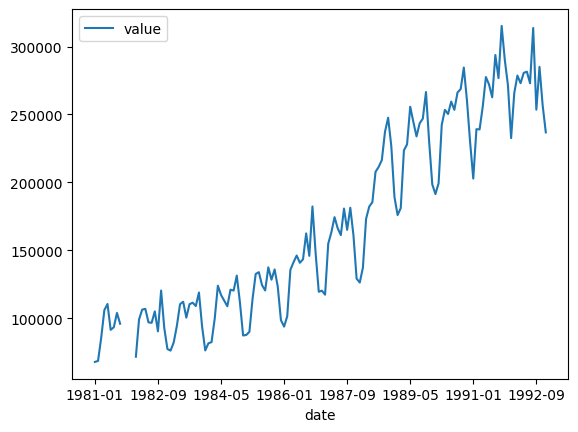

In [29]:
### 결측치 확인
df_temp.plot()
plt.show()

In [30]:
print("""
1981-01월 ~ 1982-09월 사이의 데이터가 결측된것을 시각화를 통해 확인할 수 있다.
그리고 주어진 데이터가 우상향으로 증가하는 양의 추세를 가지고 있음을 확인할 수 있다.
""")


1981-01월 ~ 1982-09월 사이의 데이터가 결측된것을 시각화를 통해 확인할 수 있다.
그리고 주어진 데이터가 우상향으로 증가하는 양의 추세를 가지고 있음을 확인할 수 있다.



In [32]:
df_temp["value"]

date
1981-01     67745.0
1981-02     68478.0
1981-03     85521.0
1981-04    105884.0
1981-05    110425.0
             ...   
1992-08    313671.0
1992-09    253522.0
1992-10    285057.0
1992-11    256798.0
1992-12    236805.0
Name: value, Length: 144, dtype: float64

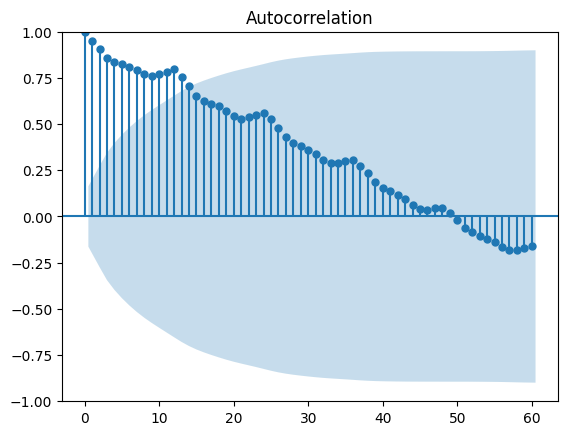

In [33]:
### 자기상관성정도와 계절성, 비정상시계열인지 정상 시계열인지 확인
from statsmodels.graphics.tsaplots import plot_acf 

plot_acf(df_temp["value"], missing="drop", lags=60)
plt.show()

In [34]:
print("""
자기상관계수의 초기부분이 신뢰구간 밖에 위치하기 때문에 강한 자기상관성을 가짐을 확인할수 있다.
그리고 자기상관계수가 빠르게 0으로 수렴하는것이 아니라 천천히 0으로 수렴하는 것으로 보아 비정상시계열임을 추측할 수있다.
그리고 시간의 지연에 따라 일정한 간격에 자기 상관계수가 갑자기 증가하는 것이 규칙적으로 보이는것으로 보아 계절성이 있음을 추측할수 있다.
향후에 비정상시계열인지 adfuller Test를 통해 확인후 로그변환과 차분을 통해 정상시계열로 바꿀 예정이다.

""")


자기상관계수의 초기부분이 신뢰구간 밖에 위치하기 때문에 강한 자기상관성을 가짐을 확인할수 있다.
그리고 자기상관계수가 빠르게 0으로 수렴하는것이 아니라 천천히 0으로 수렴하는 것으로 보아 비정상시계열임을 추측할 수있다.
그리고 시간의 지연에 따라 일정한 간격에 자기 상관계수가 갑자기 증가하는 것이 규칙적으로 보이는것으로 보아 계절성이 있음을 추측할수 있다.
향후에 비정상시계열인지 adfuller Test를 통해 확인후 로그변환과 차분을 통해 정상시계열로 바꿀 예정이다.




## 2.  **결측치 확인 및 결측치를 대치하시오.**

In [35]:
# 결측치 개수 확인
df_temp.isnull().sum()

value    4
dtype: int64

In [38]:
total_num = len(df_temp)
nan_nm = 4
ratio = nan_nm / total_num

print(f"주어진 데이터셋중 결측치의 비율은 {ratio:.3f}이며 약 2.8%로 매우 작은 결측치를 가지고 있기때문에 선형 보간법을 통해 결측치를 대체합니다.")

주어진 데이터셋중 결측치의 비율은 0.028이며 약 2.8%로 매우 작은 결측치를 가지고 있기때문에 선형 보간법을 통해 결측치를 대체합니다.


In [39]:
df_temp["value"] = df_temp["value"].interpolate(method="linear")

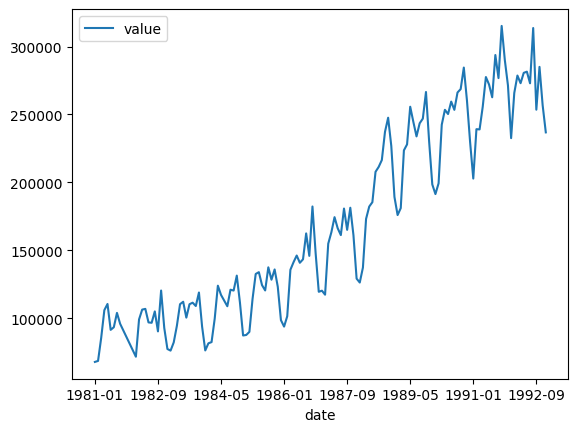

In [40]:
df_temp.plot()
plt.show()

In [41]:
print("시각화를 통해 결측치가 대치된것을 확인할 수 있다.")

시각화를 통해 결측치가 대치된것을 확인할 수 있다.


## 3.  **계절성을 포함하는 시계열 모델을 구축하고 정확도 측면에서 제시하시오.**

In [43]:
print("""
계절성을 포함하는 시계열 모델을 구축하기 전에
주어진 데이터가 정상 시계열인지 비정상시계열인지 확인후 
만약 비정상 시계열이면 로그변환과 차분을 통해 정상시계열로 변환후 모델링을 진행한다.
""")


계절성을 포함하는 시계열 모델을 구축하기 전에
주어진 데이터가 정상 시계열인지 비정상시계열인지 확인후 
만약 비정상 시계열이면 로그변환과 차분을 통해 정상시계열로 변환후 모델링을 진행한다.



In [46]:
## H0 : 데이터셋이 비정상 시계열이다.
## H1 : 데이터셋이 정상 시계열이다.

In [47]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_temp["value"])

s = result[0]
p = result[1]

In [50]:
print(f"p-value : {p:.3f}")
print("귀무가설 채택" if p > 0.05 else "귀무가설 기각")
print("데이터셋이 비정상 시계열이다.")

p-value : 0.690
귀무가설 채택
데이터셋이 비정상 시계열이다.


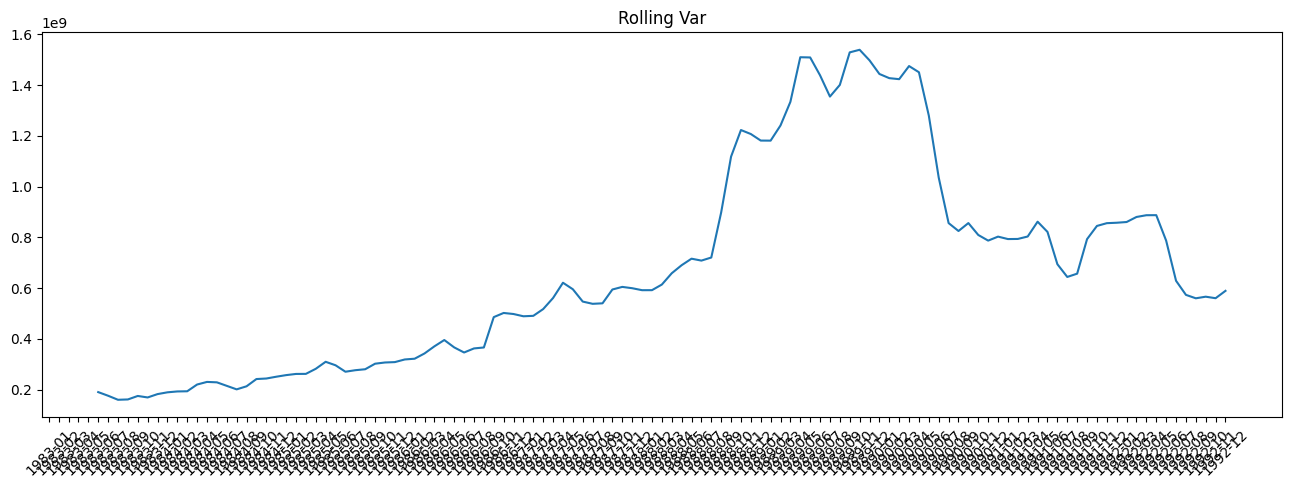

In [52]:
## 분산 시차에 따라 일정한지 확인

rolling_var = df_temp["value"].rolling(window=30).var()

plt.figure(figsize=(16,5))
plt.plot(rolling_var)
plt.title("Rolling Var")
plt.xticks(rotation=45)
plt.show()

In [53]:
print("""
시각화를 통해 분산의 시차에 따라 일정하지 않게 범위가 넓게 분포되어있음을 확인할수 있으며 그로 인한 해결책인 로그변환을 수행한다. 
""")


시각화를 통해 분산의 시차에 따라 일정하지 않게 범위가 넓게 분포되어있음을 확인할수 있으며 그로 인한 해결책인 로그변환을 수행한다. 



In [54]:
### 로그변환

df_log = np.log(df_temp[["value"]])
df_log

,value
date,
1981-01,11.123506
1981-02,11.134268
1981-03,11.356517
1981-04,11.570099
1981-05,11.612092
...,...
1992-08,12.656100
1992-09,12.443206
1992-10,12.560444


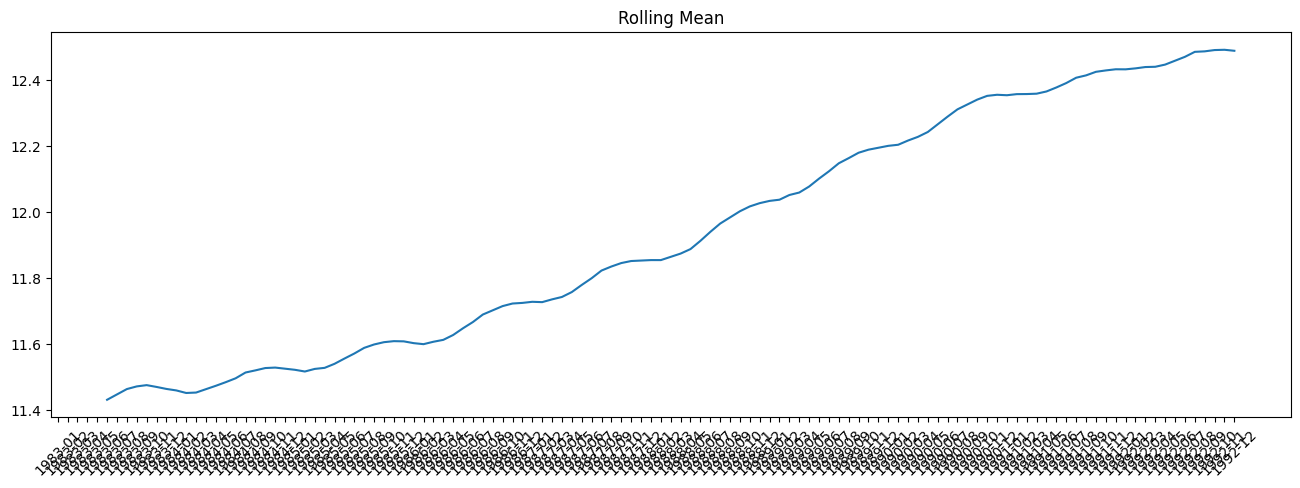

In [55]:
# 평균이 시차에 따라 일정한지 확인

rolling_mean = df_log["value"].rolling(window=30).mean()

plt.figure(figsize=(16,5))
plt.plot(rolling_mean)
plt.title("Rolling Mean")
plt.xticks(rotation=45)
plt.show()

In [57]:
print("""
시각화를 통해 확인을 하면 평균 또한 시차에 따라 일정하지 않음을 확인할수 있기에 
정상시계열을 만들기 위한 차분을 진행한다. 
""")


시각화를 통해 확인을 하면 평균 또한 시차에 따라 일정하지 않음을 확인할수 있기에 
정상시계열을 만들기 위한 차분을 진행한다. 



In [59]:
df_log_diff = df_log[["value"]].diff().dropna()
df_log_diff

,value
date,
1981-02,0.010762
1981-03,0.222249
1981-04,0.213582
1981-05,0.041992
1981-06,-0.189419
...,...
1992-08,0.138994
1992-09,-0.212894
1992-10,0.117239


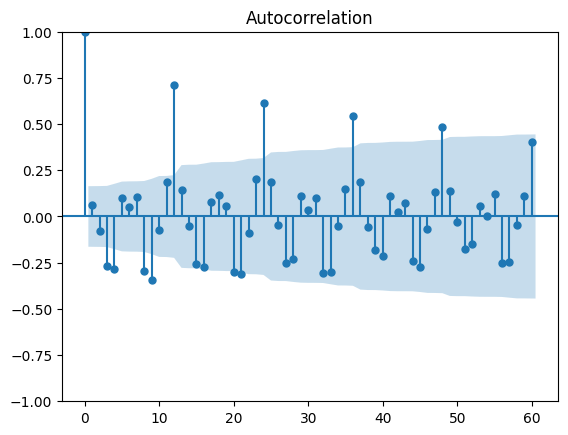

In [60]:
### 정상 시계열인지에 대한 최종확인

plot_acf(df_log_diff["value"], lags=60)
plt.show()

In [61]:
print("""
자기상관계수가 빠르게 0으로 수렴하며 절단면 안으로 들어오는 것을 통해 정상 시계열로 됬음을 추측할 수 있다.

""")


자기상관계수가 빠르게 0으로 수렴하며 절단면 안으로 들어오는 것을 통해 정상 시계열로 됬음을 추측할 수 있다.




In [64]:
result = adfuller(df_log_diff["value"])

s = result[0]
p = result[1]

In [66]:
print(f"p-value : {p:.3f}")
print("귀무가설 채택" if p > 0.05 else "귀무가설 기각")
print("데이터셋이 비정상 시계열이다.")

p-value : 0.301
귀무가설 채택
데이터셋이 비정상 시계열이다.


In [70]:
### 성능 평가를 위해 Train과 Test 데이터 8 : 2로 분리

train_len = int(len(df_log_diff)*0.8)

train = df_log_diff.iloc[:train_len, :]
test = df_log_diff.iloc[train_len:, :]

In [71]:
### 모델링 진행

print("""
계절성을 포함하는 시계열 모델을 만들기 위해 SARIMA 모델을 사용한다.

SARIMA 모델의 파라메터 값을 알기 위해 plot_acf, plot_pacf를 통해 확인 후

최종 모델을 만든다.

""")


계절성을 포함하는 시계열 모델을 만들기 위해 SARIMA 모델을 사용한다.

SARIMA 모델의 파라메터 값을 알기 위해 plot_acf, plot_pacf를 통해 확인 후

최종 모델을 만든다.




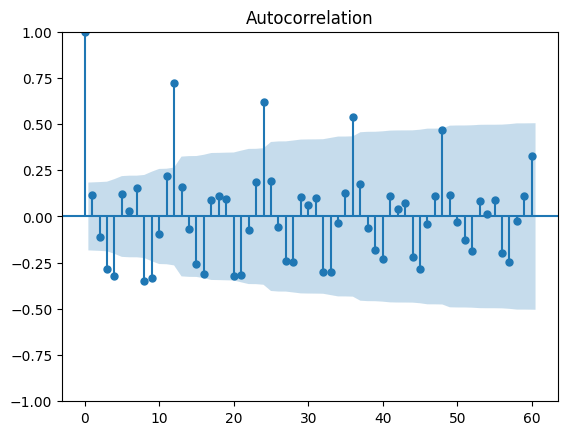

In [72]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train["value"], lags=60)
plt.show()

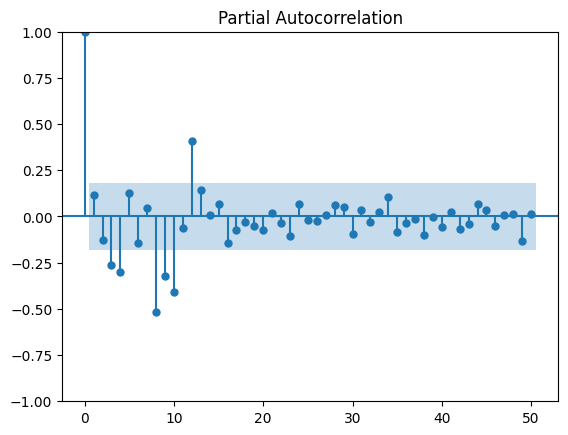

In [74]:
plot_pacf(train["value"], lags=50)
plt.show()

In [77]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
print("""
model = SARIMAX(
                train["value"],
                order=(p, d, q),
                seasonal_order = (P,D,Q,m)).fit()
                """)


model = SARIMAX(
                train["value"],
                order=(p, d, q),
                seasonal_order = (P,D,Q,m)).fit()
                


In [78]:
model_dict={"model0" : np.nan,
            "model1" : np.nan,
            "model2" : np.nan,
            "model3" : np.nan,
            "model4" : np.nan,            
           }

for i in range(0,5,1):
    model = SARIMAX(
                    train["value"],
                    order=(1, 0, 1),
                    seasonal_order = (1,0,i,12)).fit()
    model_aic = model.aic
    model_dict[f"model{i}"] = model_aic

model_dict    

{'model0': np.float64(-260.74431707941403),
 'model1': np.float64(-285.4410684491396),
 'model2': np.float64(-254.906893697393),
 'model3': np.float64(-283.2387139388706),
 'model4': np.float64(-282.077738584531)}

In [ ]:
print("""
AIC 값이 가장 작은 Q 값은  1이기 때문에 최종 Q를 1로 선정하였다.
""")

In [79]:
final_model = SARIMAX(
                train["value"],
                order=(1, 0, 1),
                seasonal_order = (1,0,1,12)).fit()

In [80]:
### 정확도 확인
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

forecast = final_model.forecast(steps=len(test))

mae = mean_absolute_error(test, forecast)
mae = mean_squared_error(test, forecast)
rmse = np.sqrt(mae)

print(f"최종 SARIMA 모델의 MAE : {mae}")
print(f"최종 SARIMA 모델의 MSE : {mae}")
print(f"최종 SARIMA 모델의 RMSE : {rmse}")

최종 SARIMA 모델의 MAE : 0.0073859109294131696
최종 SARIMA 모델의 MSE : 0.0073859109294131696
최종 SARIMA 모델의 RMSE : 0.08594132259520544


In [85]:
test

,value
date,
1990-08,0.049195
1990-09,0.009393
1990-10,0.057332
1990-11,-0.089463
1990-12,-0.125623
1991-01,-0.123615
1991-02,0.164986
1991-03,-0.000757
1991-04,0.067747


In [81]:
print("""
MAE, MSE, RMSE 모두 오차를 나타내므로 오차가 아주 작고 정확도가 높은 시계열 모델로 판단된다.
""")


MAE, MSE, RMSE 모두 오차를 나타내므로 오차가 아주 작고 정확도가 높은 시계열 모델로 판단된다.



## 4.  **업무에 적용할 수 있는지, 판단근거와 함께 서술하시오.**

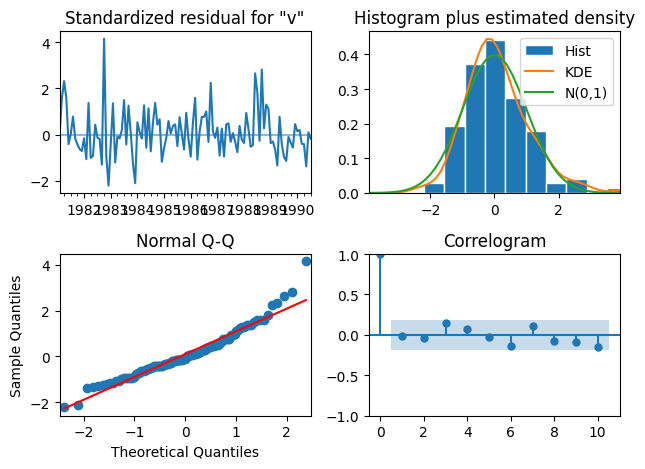

In [82]:
final_model.plot_diagnostics()
plt.tight_layout()
plt.show()

In [84]:
print("""
잔차분석을 통해 
첫번째, Standardized residual 그래프를 보면 0주변에 잔차들이 분포되어있음을 확인할수 있으며
특별한 패턴없이 랜덤으로 되어있는 것으로 확인할수 있다.
두번째, Histogram plus estimated density 그래프를 보면 표준정규분포곡선과 매우 유사한 정규성을 가지는 잔차로 볼수 있다. 약간의 첨도는 존재한다.
세번째, Noraml Q-Q 그래프를 통해 양 끝값에서 약간 벌어지기는 하지만 대부분의 잔체가 빨간선에 일치하므로 정규성을 가진다고 볼수 있다.
네번째, Correlogram 그래프를 통해 대부분의 자기상관계수가 신뢰구간안에 위치하므로 잔차간 자기상관성이 없는 것으로 볼 수 있다.

즉, 최종적으로 만든 모델은 매우 우수한 모델로 평가된다. 그리고 MAE, MSE, RMSE 값 또한 매우 작은 오차를 가지므로 업무에 적용할수 있는 매우 우수한 모델로 판단된다.
""")


잔차분석을 통해 
첫번째, Standardized residual 그래프를 보면 0주변에 잔차들이 분포되어있음을 확인할수 있으며
특별한 패턴없이 랜덤으로 되어있는 것으로 확인할수 있다.
두번째, Histogram plus estimated density 그래프를 보면 표준정규분포곡선과 매우 유사한 정규성을 가지는 잔차로 볼수 있다. 약간의 첨도는 존재한다.
세번째, Noraml Q-Q 그래프를 통해 양 끝값에서 약간 벌어지기는 하지만 대부분의 잔체가 빨간선에 일치하므로 정규성을 가진다고 볼수 있다.
네번째, Correlogram 그래프를 통해 대부분의 자기상관계수가 신뢰구간안에 위치하므로 잔차간 자기상관성이 없는 것으로 볼 수 있다.

즉, 최종적으로 만든 모델은 매우 우수한 모델로 평가된다. 그리고 MAE, MSE, RMSE 값 또한 매우 작은 오차를 가지므로 업무에 적용할수 있는 매우 우수한 모델로 판단된다.

